# Project 1: TMDb Movie Data Analysis
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#body">Data Analysis Project</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>   
</ul>

<a id='intro'></a>
## Introduction
This project involves the analysis of TMDb Movie data to detect patterns in the collection of movies and genres, and identify relationships among variables in the dataset. 

#### Dataset Description:
TMDb Movie Data contains information about 10,000 movie titles from The Movie Database. This data shows information and details regarding movie titles released from 1960 to 2015. The fields in the original datasets are: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj.

#### Questions for Analysis:

1. What are the top-10 grossing movies?.
2. What are the most popular genres in 2015?
3. What are the most rated movie genres across the periods (1960-2015)? 
4. Is there an association between movie popularity and revenue generated?
5. Is there an association between runtime and user ratings?
6. Is there an association between movie popularity and number of ratings?


<a id='body'></a>
## Data Analysis Project

#### Steps:
<ul>
<li><a href="#import">Import Relevant Packages</a></li>
<li><a href="#wrangle">Wrangle Data</a></li>
<li><a href="#explore">Explore and Analyze Data</a></li>
<li><a href="#visualize">Visualize Data</a></li>
</ul>

---

<a id='import'></a>
### Import Relevant Packages

In [1]:
# import required packages for the investigation and analysis of tmdb movie data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangle'></a>
### Wrangle Data
In this section, I will explore general properties of the original dataset to identify shape of data (i.e. number of rows and columns), data types of headers, header names, statistical information, missing rows/columns, duplicate rows etc.

I will also prepare and clean the data so that it is suited for the analysis in order to answer the framed questions above.

#### General Properties

In [2]:
# Load datasets and print first five rows
original_df = pd.read_csv('tmdb-movies.csv')
original_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
# Assess data to identify general properties of columns 
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# find the number of rows in the data
original_df.shape

(10866, 21)

In [5]:
# Check for duplicates
sum(original_df.duplicated())

1

In [6]:
#retrieve statistical information of numerical variables (original dataset)
original_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> The original dataset contains 21 columns and 10866 rows/observations. From observation of field properties, fields having missing values include: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies. I also found one duplicate observation in the original dataset.

#### Prepare and Clean Data
The next step is to clean the data by removing duplicates, splitting column(s), handling missing values, removing columns irrelevant to the framed questions for analysis, derive/add new column(s).

In [7]:
#make a copy of original dataset to be used for the data analysis project
tmdb_df = original_df

In [8]:
# Remove the duplicate found in the data to ensure uniqueness
tmdb_df.drop_duplicates(inplace=True)
tmdb_df.shape

(10865, 21)

In [9]:
#Check if there is still duplicates in dataset.
sum(tmdb_df.duplicated())

0

> There are now 10865 observations and no duplicate observation(s).

**Note**: Some columns would be dropped from the dataframe because they are not relevant to answering questions for analysis in the project. These columns are: (id, imdb_id, budget, revenue, cast, homepage, tagline, overview, keywords, release_date, production_companies)

In [10]:
#remove these columns irrelevant to the analysis from the datasets: id, imdb_id, budget, revenue, cast, director,homepage, tagline, 
# overview, keywords, release_date, production_companies
irr_columns = ['id', 'imdb_id', 'budget_adj','revenue_adj','cast','director' ,'homepage', 'tagline', 'overview', 'keywords','release_date', 'production_companies']
tmdb_df = tmdb_df.drop(axis=1, columns=irr_columns)

In [11]:
#check if columns have been dropped from dataframe
tmdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


In [12]:
#general info about the new data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   genres          10842 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 848.8+ KB


> There are 23 missing value in genres column. The rows with these missing values would be excluded from the analysis by subsetting the data to include only those rows that have value for the genres column.

In [13]:
#investigate the top three rows of new data
tmdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


**Note**: These are the columns needed for analysis. The genres column column contains multiple values seperated by '|' hence I will split the values and use the first split as the main genre because my analysis only requires the main genres for the associated movies.

In [14]:
#subset data to exclude rows with missing values in genres column
tmdb_df= tmdb_df[~tmdb_df['genres'].isnull()]

In [15]:
#split values in genres column by the delimiter (|) and use the first split as the main_genre column (a new column)
tmdb_df['main_genre'] = tmdb_df['genres'].str.split('|').str[0]
tmdb_df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,main_genre
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,Action
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,Adventure
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,Action
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,Action


In [16]:
#drop the original genres column and retreive top three rows to verify.
tmdb_df.drop('genres', axis=1, inplace=True)
tmdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,main_genre
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,Action
2,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,Adventure


**Note:** The following is the list of columns in the cleaned dataset (to be used for analysis and visualization) and their descriptions:
- **popularity**: movie popularity
- **budget**: the budget of the associated movie
- **revenue**: the revenue of the associated movie
- **original_title**: title of movie
- **runtime**: length of the movie
- **vote_count**: number of ratings
- **vote_average**: average ratings
- **release_year**: year movie was released
- **main_genre**: the main thematic or stylistic categorization of a movie

<a id='explore'></a>
## Explore and Analyze Data

#### Explore Data
This step involves the exploratory data analysis to identify patterns in data, distribution of categorical and continuous variables, and identify relationships among variables. 

I would be performing EDA to understand the distribution of the variables (i.e. fields) using different plots (i.e. bar, histogram, scatter plot)

In [17]:
#retrieve top three rows
tmdb_df.head(3)

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,main_genre
0,32.985763,150000000,1513528810,Jurassic World,124,5562,6.5,2015,Action
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,6185,7.1,2015,Action
2,13.112507,110000000,295238201,Insurgent,119,2480,6.3,2015,Adventure


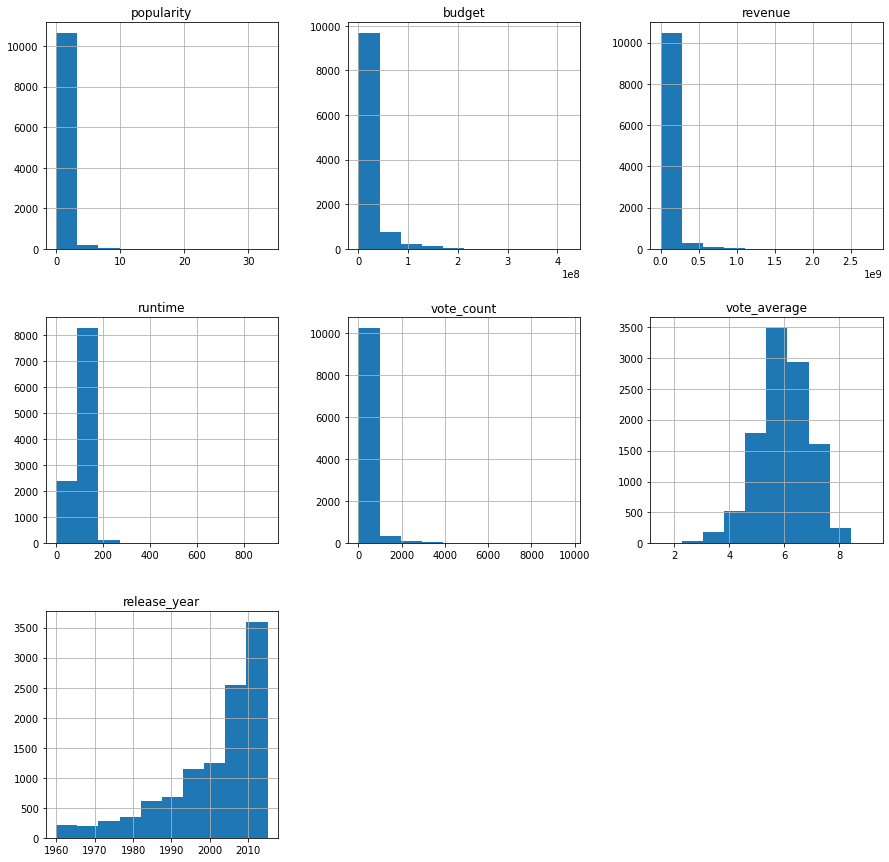

In [18]:
#plot histogram for the continuous variables to identify the distribution and set appropriate figsize
tmdb_df.hist(figsize=(15,15));

<AxesSubplot:>

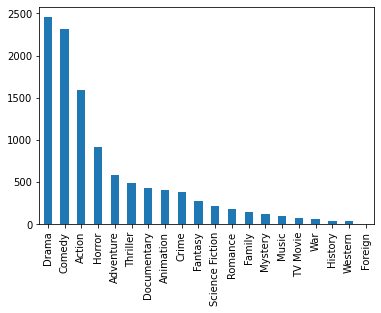

In [19]:
#check the frequency distribution of categorical variable: main_genre
tmdb_df['main_genre'].value_counts().plot(kind='bar')

<AxesSubplot:>

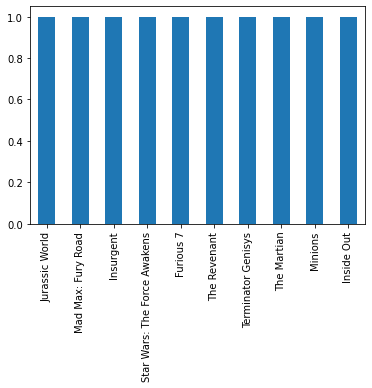

In [20]:
#check the frequency distribution of categorical variable: original_title (first 10 movies)
tmdb_df['original_title'].head(10).value_counts().plot(kind='bar')

> **EDA Findings:** I discovered that revenue, budget, popularity and vote_count are right-skewed; Most movies released between 2010 to 2015; Drama is the genre with the highest number of movie titles. After EDA, the next step is to answer the framed questions using proper analysis techniques and visualizations.

#### Analyse Data

#### Question 1: What are the top-5 grossing movies?

In [21]:
#subset data using only original_title and revenue, then sort by revenue in descending order
#get top 5 titles in that order (i.e. the top 5 titles with the highest revenues)
top_grossed = tmdb_df[['original_title','revenue']].sort_values('revenue', ascending=False).head(5)
top_grossed.set_index('original_title', inplace=True)
top_grossed

,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810


> **Findings:** The top 5 grossing movies between 1960 to 2015 are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers and Jurassic World i.e. the movie titles with the highest revenues

#### Question 2: What are top-5 popular movie genre in 2015?

In [22]:
#subset data to use only rows having 2015 has release year
tmdb_df_2015 = tmdb_df.loc[tmdb_df['release_year']==2015]
popular_genres = tmdb_df_2015[['main_genre','popularity']].groupby('main_genre').mean().round(1).sort_values('popularity', ascending=False).head(5)
popular_genres

,popularity
main_genre,
Western,4.9
Action,2.9
War,2.1
Adventure,2.1
Crime,1.8


> **Findings**: From the analysis, the top 5 popular movie genres in 2015 were Western, Action, War, Adventure and Crime. To further analyse, What western movies (i.e. the most popular genre in 2015) were popular?. To achieve this, i will subset data to include only movies whose main genre is 'western'.

In [23]:
#subset data in the 2015 movie data (previous subset) to retrieve only rows where the main_genre is 'Western'
#get top three rows in the subset data
western_df = tmdb_df_2015[tmdb_df_2015['main_genre']=='Western']
western_df.head(3)

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,main_genre
5,9.110700,135000000,532950503,The Revenant,156,3929,7.2,2015,Western
194,0.747541,11000000,0,Forsaken,90,53,5.6,2015,Western


In [24]:
#to investigate further, using the data in previous output, sort the western movies in descending order of popularity
#print the data
pop_western_movies = western_df[['original_title','popularity']].sort_values('popularity', ascending=False).head()
pop_western_movies.set_index('original_title', inplace=True)
pop_western_movies

,popularity
original_title,
The Revenant,9.110700
Forsaken,0.747541


> **Findings**: From further analysis, i have discovered that there were only two western movies in 2015. The western movie category was the most popular in 2015 because 'The Revenant' had a very high popularity score of 9.1.

#### Question 3: What are the highly rated movie genres? 

In [25]:
#Use groupby to calculate the mean user rating/voting of each unique movie genre
#sort the data in descending order of vote_average
avg_user_ratings = tmdb_df.groupby('main_genre',as_index=False)['vote_average'].mean().round(1)
avg_user_ratings.sort_values('vote_average',ascending=False, inplace=True)
avg_user_ratings.set_index('main_genre',inplace=True)
avg_user_ratings.head(5)

,vote_average
main_genre,
Documentary,6.9
Music,6.6
History,6.4
Animation,6.4
War,6.2


> **Findings:** Based on analysis, the most rated movie genres (i.e. the genres with top average user ratings) are Documentary, Music, History, Animation and War.

#### Question 4: Is there an association between movie popularity and revenue generated?


In [26]:
#calculate correlation coefficient of popularity and revenue using corr function
subset2 = tmdb_df[['popularity','revenue']]
subset2.corr()

,popularity,revenue
popularity,1.000000,0.663268
revenue,0.663268,1.000000


> **Findings:** There is a strong positive relationship between movie popularity and the assoiated revenue because the correlation coefficient is 0.67 (a positive value close to 1). That is, popularity of a movie is strongly associated with the revenue generated.

#### Question 5: Is there an association between runtime and user average ratings?


In [27]:
#calculate the correlation coefficient of runtime and vote_average
subset3 = tmdb_df[['runtime','vote_average']]
subset3.corr()

,runtime,vote_average
runtime,1.000000,0.158033
vote_average,0.158033,1.000000


> **Findings:** There is a weak relationship or association between runtime and the user average ratings because the correlation score is 0.16 (close to 0). That is, the run time of a movie is not associated with the user ratings.

#### Question 6: Is there an association between movie popularity and number of ratings?


In [28]:
#calculate the correlation coefficient of popularity and vote_count
subset4 = tmdb_df[['popularity','vote_count']]
subset4.corr()

,popularity,vote_count
popularity,1.000000,0.800786
vote_count,0.800786,1.000000


> **Findings:** There is a strong positive relationship between populaity and the number of ratings because the correlation score is 0.8 (close to 1). That is, the popularity of a movie is strongly associated with the number of ratings or votings.

<a id='visualize'></a>
### Visualize Data
This section contains the visualizations to present the analysis and findings based on the framed research questions.

In [29]:
#set matplotlib and seaborn style and design for the visualizations in this project
plt.style.use('ggplot')
sns.set(style='white') 

**Note**: The following custom function (plot_chart) is a reusable function for plotting the charts or visuals for presenting analyses and findings. 
- It has three required arguments (df, title and kind)
- It has nine optional arguments (x, y, xlabel, ylabel, rot, sub, color). Usage depends on type of chart.

**Usage:** 
- pie chart: sub must be specified as True in called function.
- scatterplot: x, y, color must be specified in called function.
- bar chart: none of the optional arguments must be specified

In [30]:
#custom function (plot_chart) to plot visualizations that present the analyses
def plot_chart(df, title, kind ,x=None, y=None, xlabel='xlabel', ylabel='ylabel', rot=0, sub=False, color='blue'):
    #df is the data or analysis to be visualized
    #title is the title of the visual to be plotted
    #x is x-axis (applies to scatterplot only)
    #y is y-axis (applies to scatterplot only)
    #xlabel is x-axis label or title
    #ylabel is y-axis label or title
    #kind is type of chart to plot e.g bar or pie 
    #rot is degree of rotation for x-axis values
    #sub represent subtotals (applies to only pie chart)
    #color represent color of chart
    if kind == 'pie':
        sub = True
    else:
        sub = False
    if kind =='scatter':
        df.plot(x, y, kind=kind, color=color, subplots=sub)
    else:
        df.plot(kind=kind, subplots=sub)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rot)
    plt.figure(figsize=(10,10))
    plt.show()

**Question 1**

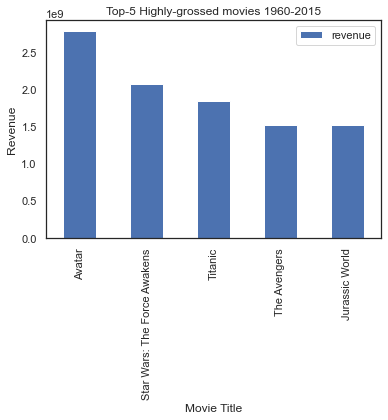

<Figure size 720x720 with 0 Axes>

In [31]:
plot_chart(top_grossed, 'Top-5 Highly-grossed movies 1960-2015', 'bar', xlabel='Movie Title', ylabel='Revenue', rot=90)

> **Narrative:** The top 5 grossing movies between 1960 to 2015 are Avatar, Star Wars: The Force Awakens, Titanic, The Avengers and Jurassic World i.e. the movie titles with the highest revenues

**Question 2**

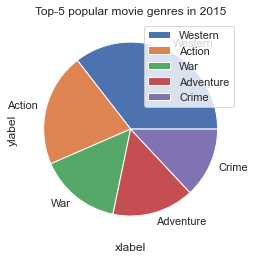

<Figure size 720x720 with 0 Axes>

In [32]:
plot_chart(popular_genres, 'Top-5 popular movie genres in 2015', 'pie')

> **Narrative**: From the analysis, the top 5 popular movie genres in 2015 were Western, Action, War, Adventure and Crime.

**Question 3**

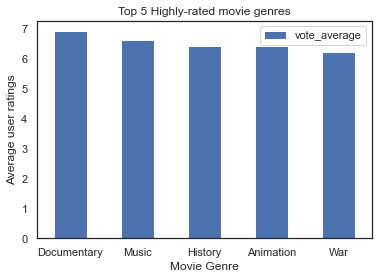

<Figure size 720x720 with 0 Axes>

In [33]:
plot_chart(avg_user_ratings.head(5), 'Top 5 Highly-rated movie genres', 'bar', xlabel='Movie Genre', ylabel='Average user ratings', rot=0)

> **Narratives:** Based on analysis, the most rated movie genres (i.e. the genres with top average user ratings) are Documentary, Music, History, Animation and War.

**Question 4**

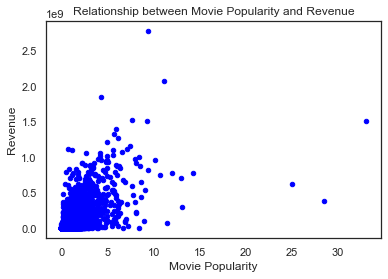

<Figure size 720x720 with 0 Axes>

In [34]:
plot_chart(tmdb_df, 'Relationship between Movie Popularity and Revenue', kind='scatter', x='popularity', y='revenue', xlabel='Movie Popularity',ylabel='Revenue', color='blue')

> **Narrative:** There is a strong positive linear relationship between movie popularity and the assoiated revenue. That is, popularity of a movie is strongly associated with the revenue generated.

**Question 5**

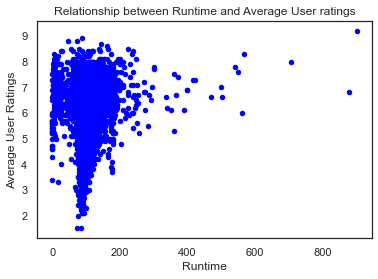

<Figure size 720x720 with 0 Axes>

In [35]:
plot_chart(tmdb_df, 'Relationship between Runtime and Average User ratings', kind='scatter', x='runtime', y='vote_average', xlabel='Runtime',ylabel='Average User Ratings', color='blue')

> **Narrative:** There is a non-linear relationship between runtime and the user average ratings hence runtime is not associated with user ratings.

**Question 6**

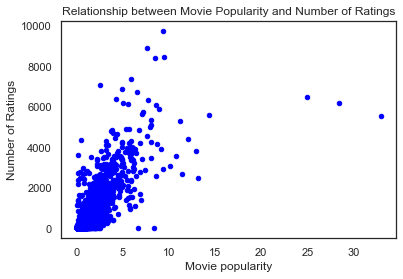

<Figure size 720x720 with 0 Axes>

In [36]:
plot_chart(tmdb_df, 'Relationship between Movie Popularity and Number of Ratings', kind='scatter', x='popularity', y='vote_count', xlabel='Movie popularity',ylabel='Number of Ratings', color='blue')

> **Narrative:** There is a strong positive linear relationship between populaity and the number of ratings. That is, the popularity of a movie is strongly associated with the number of ratings or votings.

<a id='conclusions'></a>
## Conclusions

- **Data Wrangling**: Before analysing the data, I dropped irrelevant columns, split genres column (and used the first split as the main genre for the movies), removed duplicates, dropped rows with missing value (in genres column) and prepare the data for easy analyses and visualization. 

- **Data Exploration**: I explored the cleaned dataset using relevant methods such as plotting histograms for all the columns having continuous values, using bar chart to explore other columns (i.e. categorical and nominal) etc

- **Data Analyses**: To answer the framed questions, i used different in-built functions (groupby, sort_values, value_counts, plot etc). To quantify relationship between variables, i used corr function to get correlation coefficient.

- **Data Visualization**: I used matplotlib, seaborn style, pandas plot to visualize the analyses. Types of charts used are bar chart, pie chart, scatter plot.

- **Summary of Findings**: In summary, i have discovered the top grossing movies, most popular and highly-rated genre of movies in the dataset. I have also discovered that movie popularity strongly affect revenue and user ratings.

<a id='limitations'></a>
## Limitations
- The movie dataset does not include a metadata that describes key variables e.g budget, revenue that can be used to detect more interesting patterns. That is, the currency for the movie budget and revenue was not provided.
- The latest movie titles in the data were released in 2015 making it an outdated dataset.

<a id='references'></a>
## References
- <a href='https://pandas.pydata.org/docs/index.html'>Pandas Documentation</a>
- <a href='https://stackoverflow.com/'>Stackoverflow Community</a>